In [1]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model, losses
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, Layer
from tensorflow.keras.datasets import cifar10
import numpy as np

In [2]:
(x_train, _), (x_test, _) = cifar10.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [4]:
class Encoder(Layer):
    def __init__(self, filters=16, kernel_size=3, strides=2, **kwargs):
        super(Encoder, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
    
    def build(self, input_shape):
        self.conv2d1 = Conv2D(self.filters, self.kernel_size, activation='relu', padding='same', strides=self.strides)
    
    def call(self, inputs):
        x = self.conv2d1(inputs)
        return x

In [5]:
class Decoder(Layer):
    def __init__(self, size=2, kernel_size=3, **kwargs):
        super(Decoder, self).__init__(**kwargs)
        self.size = size
        self.kernel_size = kernel_size
    
    def build(self, input_shape):
        self.upsampling2d = UpSampling2D(size=self.size)
        self.conv2d = Conv2D(3, kernel_size=self.kernel_size, activation='sigmoid', padding='same')
    
    def call(self, inputs):
        x = self.upsampling2d(inputs)
        x = self.conv2d(x)
        return x

In [6]:
class AutoEncoder(Model):
    def __init__(self, encoding_dim=1024, **kwargs):
        super(AutoEncoder, self).__init__(**kwargs)
        self.encoder = Encoder(filters=16, kernel_size=3, strides=2, name="encoder")
        self.decoder = Decoder(size=2, kernel_size=3, name="decoder")
    
    def call(self, inputs):
        x = self.encoder(inputs)
        x = self.decoder(x)
        return x

In [7]:
autoencoder = AutoEncoder(name="autoencoder")

In [8]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [9]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0058 - val_loss: 0.0018
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 4/10
1563/1563 [==============================] - 27s 18ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 7/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 8/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 10/10
1563/1563 [==============================] - 31s 20m

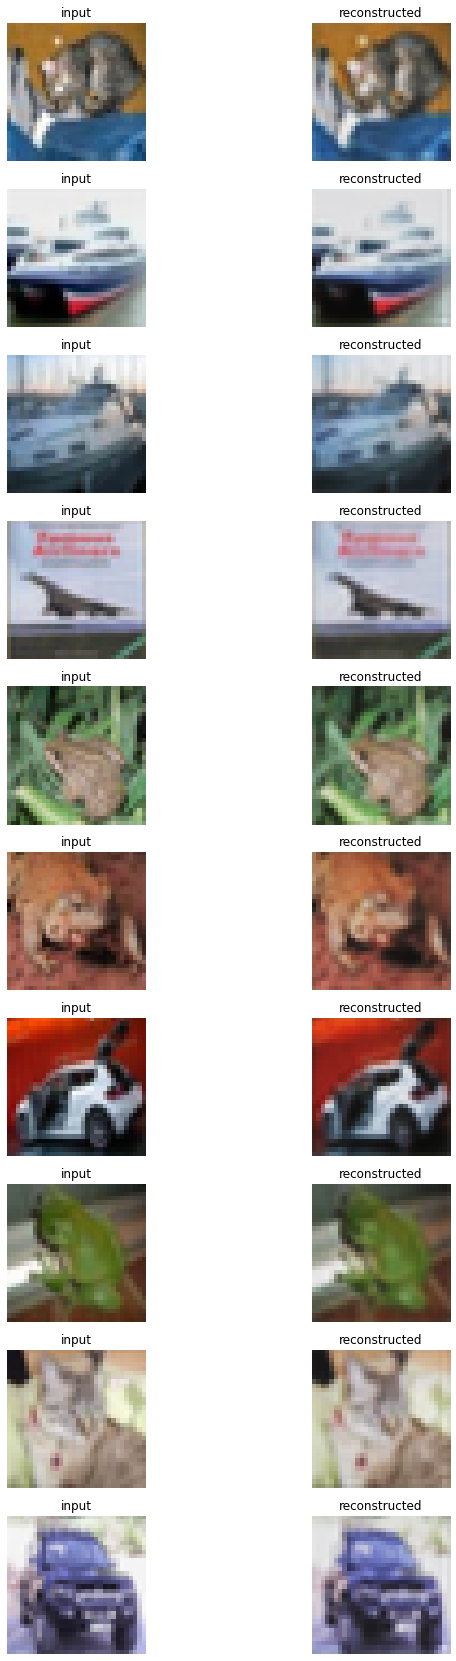

In [10]:
fig = plt.figure(figsize=(10, 30))
for i in range(10):
    ax1 = fig.add_subplot(10, 2, 2 * i + 1)
    ax2 = fig.add_subplot(10, 2, 2 * i + 2)
    ax1.axis('off')
    ax1.imshow(x_test[i])
    ax1.set_title('input')
    x = tf.expand_dims(x_test[i], 0)
    predicted = autoencoder.predict(x)
    ax2.axis('off')
    ax2.imshow(predicted[0])
    ax2.set_title('reconstructed')
plt.show()